In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

14th of April - 17:20 

Gathered 60 seconds of data, 
Individual finger movements, grouped finger movements (pairs) and all finger closing (grasping).

In [37]:
data = pd.read_csv("../data/dataset-full_hand-60s.csv")

In [38]:
data.head()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Palm_x,Palm_y,...,Pinky_MCP_z,Pinky_PIP_x,Pinky_PIP_y,Pinky_PIP_z,Pinky_DIP_x,Pinky_DIP_y,Pinky_DIP_z,Pinky_TIP_x,Pinky_TIP_y,Pinky_TIP_z
0,38,269,111,47,101,35,22,23,-13.892977,-24.676735,...,127.042839,113.481201,131.047806,137.758286,128.349930,116.208405,119.820808,124.822617,118.878288,108.890717
1,39,356,120,62,146,39,24,25,-13.852209,-24.586508,...,127.192207,113.670609,131.218033,137.775970,128.412369,116.329781,120.034424,124.847496,118.893349,108.933693
2,35,434,128,72,185,37,25,25,-13.813737,-24.502161,...,127.295685,113.810234,131.367523,137.758301,128.447525,116.435005,120.223473,124.852211,118.890427,108.961174
3,32,476,137,74,205,39,24,27,-13.736932,-24.342701,...,127.465889,114.056679,131.638794,137.674881,128.473282,116.613785,120.565979,124.868614,118.919731,109.070923
4,33,490,140,79,217,38,25,27,-13.693318,-24.266806,...,127.565887,114.191597,131.785568,137.642868,128.489487,116.704178,120.750320,124.913513,118.978653,109.172569


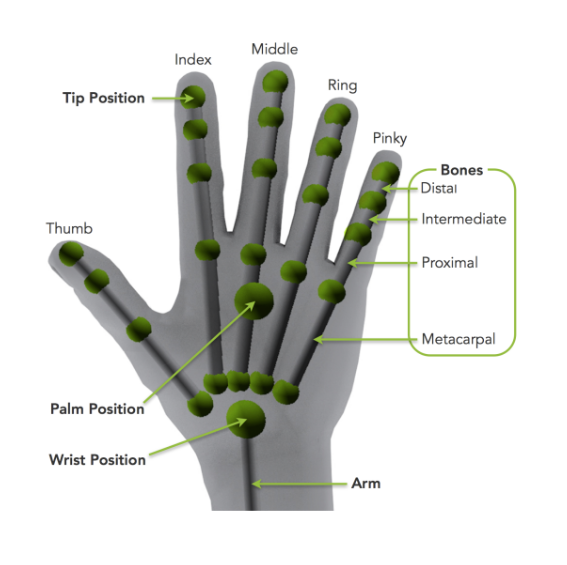

```
0 = JOINT_MCP – The metacarpophalangeal joint, or knuckle, of the finger.
1 = JOINT_PIP – The proximal interphalangeal joint of the finger.This is the middle joint of a finger.
2 = JOINT_DIP – The distal interphalangeal joint of the finger. This joint is closest to the tip.
3 = JOINT_TIP – The tip of the finger.
```

In [39]:
leap_bone_columns = [
    "Palm_x", "Palm_y", "Palm_z",
    "Wrist_x", "Wrist_y", "Wrist_z",
    'Thumb_MCP_x', 'Thumb_MCP_y', 'Thumb_MCP_z',
    'Thumb_PIP_x', 'Thumb_PIP_y', 'Thumb_PIP_z',
    'Thumb_DIP_x', 'Thumb_DIP_y', 'Thumb_DIP_z',
    'Thumb_TIP_x', 'Thumb_TIP_y', 'Thumb_TIP_z',
    'Index_MCP_x', 'Index_MCP_y', 'Index_MCP_z',
    'Index_PIP_x', 'Index_PIP_y', 'Index_PIP_z',
    'Index_DIP_x', 'Index_DIP_y', 'Index_DIP_z',
    'Index_TIP_x', 'Index_TIP_y', 'Index_TIP_z',
    'Middle_MCP_x', 'Middle_MCP_y', 'Middle_MCP_z',
    'Middle_PIP_x', 'Middle_PIP_y', 'Middle_PIP_z',
    'Middle_DIP_x', 'Middle_DIP_y', 'Middle_DIP_z',
    'Middle_TIP_x', 'Middle_TIP_y', 'Middle_TIP_z',
    'Ring_MCP_x', 'Ring_MCP_y', 'Ring_MCP_z',
    'Ring_PIP_x', 'Ring_PIP_y', 'Ring_PIP_z',
    'Ring_DIP_x', 'Ring_DIP_y', 'Ring_DIP_z',
    'Ring_TIP_x', 'Ring_TIP_y', 'Ring_TIP_z',
    'Pinky_MCP_x', 'Pinky_MCP_y', 'Pinky_MCP_z',
    'Pinky_PIP_x', 'Pinky_PIP_y', 'Pinky_PIP_z',
    'Pinky_DIP_x', 'Pinky_DIP_y', 'Pinky_DIP_z',
    'Pinky_TIP_x', 'Pinky_TIP_y', 'Pinky_TIP_z'
    ]
len(leap_bone_columns)

66

In [40]:
66 - 3

63

In [41]:
data.shape

(2990, 74)

## Plotting an example point. 

In [42]:
data.columns

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Palm_x', 'Palm_y', 'Palm_z',
       'Wrist_x', 'Wrist_y', 'Wrist_z', 'Thumb_MCP_x', 'Thumb_MCP_y',
       'Thumb_MCP_z', 'Thumb_PIP_x', 'Thumb_PIP_y', 'Thumb_PIP_z',
       'Thumb_DIP_x', 'Thumb_DIP_y', 'Thumb_DIP_z', 'Thumb_TIP_x',
       'Thumb_TIP_y', 'Thumb_TIP_z', 'Index_MCP_x', 'Index_MCP_y',
       'Index_MCP_z', 'Index_PIP_x', 'Index_PIP_y', 'Index_PIP_z',
       'Index_DIP_x', 'Index_DIP_y', 'Index_DIP_z', 'Index_TIP_x',
       'Index_TIP_y', 'Index_TIP_z', 'Middle_MCP_x', 'Middle_MCP_y',
       'Middle_MCP_z', 'Middle_PIP_x', 'Middle_PIP_y', 'Middle_PIP_z',
       'Middle_DIP_x', 'Middle_DIP_y', 'Middle_DIP_z', 'Middle_TIP_x',
       'Middle_TIP_y', 'Middle_TIP_z', 'Ring_MCP_x', 'Ring_MCP_y',
       'Ring_MCP_z', 'Ring_PIP_x', 'Ring_PIP_y', 'Ring_PIP_z', 'Ring_DIP_x',
       'Ring_DIP_y', 'Ring_DIP_z', 'Ring_TIP_x', 'Ring_TIP_y', 'Ring_TIP_z',
       'Pinky_M

In [43]:
channel_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5','Channel_6', 'Channel_7', 'Channel_8']
bone_df = data.drop(channel_cols, 1)

examp_frame = bone_df.iloc[10].values

# Five finger, 4 joints + palm, wrist. x,y,z
NUM_POINTS = (5 * 4 + 2) * 3
examp_frame = examp_frame.reshape((3, NUM_POINTS//3))

### Plotting points of the hand

<IPython.core.display.Javascript object>


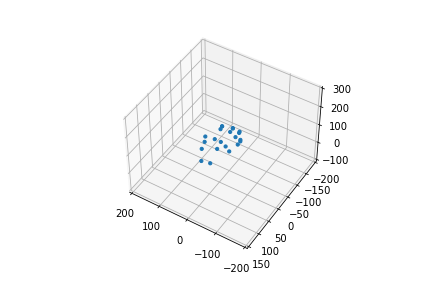

In [44]:
def plot_points(points, scatter):
    scatter.set_offsets(points[:2].T)
    scatter.set_3d_properties(points[2], zdir='z')
    
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_frame, patches)

<IPython.core.display.Javascript object>


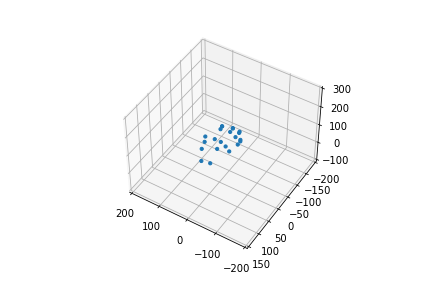

In [45]:
pred = data.iloc[10].drop(channel_cols).values

# Five finger, 4 joints + palm,wrist. x,y,z
NUM_POINTS = (5 * 4 + 2) * 3

# Change the shape by adding a new point on
pred_points = pred.reshape((3, (NUM_POINTS)//3))

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_frame, patches)

## Plotting the whole hand

In [46]:
# Plotting the whole hand
def plot_bone_lines(points, ax):
    '''
    Plot the lines for the hand based on a full hand model.
    (22 points, 66 vars)
    '''
    mcps = []

    # Wrist
    wrist = points[:,1]

    # For Each of the 5 fingers
    for i in range(0,5):
        n = 4*i + 2

        # Get each of the bones
        mcp = points[:,n+0]
        pip = points[:,n+1]
        dip = points[:,n+2]
        tip = points[:,n+3]

        # Connect the lowest joint to the middle joint
        bot = plt3d.art3d.Line3D([mcp[0], pip[0]], [mcp[1], pip[1]], [mcp[2], pip[2]])
        ax.add_line(bot)

        # Connect the middle joint to the top joint
        mid = plt3d.art3d.Line3D([pip[0], dip[0]], [pip[1], dip[1]], [pip[2], dip[2]])
        ax.add_line(mid)

        # Connect the top joint to the tip of the finger
        top = plt3d.art3d.Line3D([dip[0], tip[0]], [dip[1], tip[1]], [dip[2], tip[2]])
        ax.add_line(top)

        # Connect each of the fingers together
        mcps.append(mcp)
    for mcp in range(0,4):
        line = plt3d.art3d.Line3D([mcps[mcp][0], mcps[mcp+1][0]],
                                  [mcps[mcp][1], mcps[mcp+1][1]],
                                  [mcps[mcp][2], mcps[mcp+1][2]])
        ax.add_line(line)
    # Create the right side of the hand joining the pinkie mcp to the "wrist"
    line = plt3d.art3d.Line3D([wrist[0], mcps[4][0]],
                                  [wrist[1], mcps[3+1][1]],
                                  [wrist[2], mcps[3+1][2]])
    ax.add_line(line)

    # Generate the "Wrist", note right side is not right.
    line = plt3d.art3d.Line3D([wrist[0], mcps[0][0]],
                                  [wrist[1], mcps[0][1]],
                                  [wrist[2], mcps[0][2]])
    ax.add_line(line)

    # Connext the left hand side of the index finger to the thumb.
    thumb_mcp = points[:,1+2]
    pinky_mcp = points[:,4+2]
    line = plt3d.art3d.Line3D([thumb_mcp[0], pinky_mcp[0]],
                                  [thumb_mcp[1], pinky_mcp[1]],
                                  [thumb_mcp[2], pinky_mcp[2]])
    ax.add_line(line)

<IPython.core.display.Javascript object>


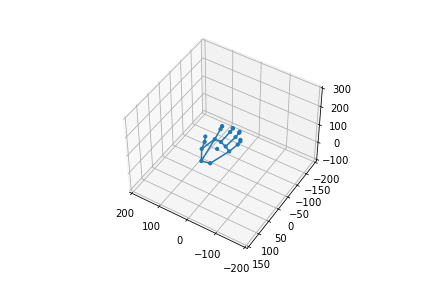

In [47]:
import mpl_toolkits.mplot3d as plt3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
ax.view_init(elev=45., azim=122)

points_ = np.zeros((3, NUM_POINTS))
sizes = [10]*(NUM_POINTS//3)
sizes[0] = 30
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(examp_frame, patches)
plot_bone_lines(examp_frame,ax)

<IPython.core.display.Javascript object>


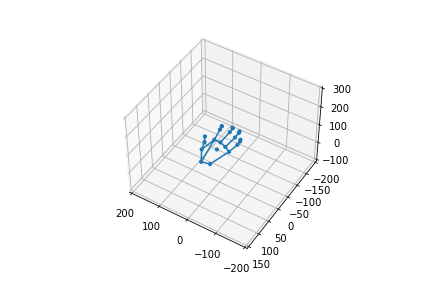

In [67]:
def plot_row_bones(row):
    channel_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5','Channel_6', 'Channel_7', 'Channel_8']
    try:
        bone_df = row.drop(channel_cols)
    except:
        bone_df = row
    # Five finger, 4 joints + palm, wrist. x,y,z
    NUM_POINTS = (5 * 4 + 2) * 3
    examp_frame = bone_df.values.reshape((3, NUM_POINTS//3))
    
    # Plot setup
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
    ax.view_init(elev=45., azim=122)

    points_ = np.zeros((3, NUM_POINTS))
    sizes = [10]*(NUM_POINTS//3)
    sizes[0] = 30
    patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

    # Plot the hand
    plot_points(examp_frame, patches)
    plot_bone_lines(examp_frame,ax)
    
plot_row_bones(data.iloc[15])

# Making a relative hand model

### Feature extraction, making it relative

In [49]:
data.columns

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Palm_x', 'Palm_y', 'Palm_z',
       'Wrist_x', 'Wrist_y', 'Wrist_z', 'Thumb_MCP_x', 'Thumb_MCP_y',
       'Thumb_MCP_z', 'Thumb_PIP_x', 'Thumb_PIP_y', 'Thumb_PIP_z',
       'Thumb_DIP_x', 'Thumb_DIP_y', 'Thumb_DIP_z', 'Thumb_TIP_x',
       'Thumb_TIP_y', 'Thumb_TIP_z', 'Index_MCP_x', 'Index_MCP_y',
       'Index_MCP_z', 'Index_PIP_x', 'Index_PIP_y', 'Index_PIP_z',
       'Index_DIP_x', 'Index_DIP_y', 'Index_DIP_z', 'Index_TIP_x',
       'Index_TIP_y', 'Index_TIP_z', 'Middle_MCP_x', 'Middle_MCP_y',
       'Middle_MCP_z', 'Middle_PIP_x', 'Middle_PIP_y', 'Middle_PIP_z',
       'Middle_DIP_x', 'Middle_DIP_y', 'Middle_DIP_z', 'Middle_TIP_x',
       'Middle_TIP_y', 'Middle_TIP_z', 'Ring_MCP_x', 'Ring_MCP_y',
       'Ring_MCP_z', 'Ring_PIP_x', 'Ring_PIP_y', 'Ring_PIP_z', 'Ring_DIP_x',
       'Ring_DIP_y', 'Ring_DIP_z', 'Ring_TIP_x', 'Ring_TIP_y', 'Ring_TIP_z',
       'Pinky_M

In [50]:
bone_cols_x = ["Palm_x"]
bone_cols_y = ["Palm_y"]
bone_cols_z = ["Palm_z"]

# Dont forget about the wrist
bone_cols_x.append("Wrist_x")
bone_cols_y.append("Wrist_y")
bone_cols_z.append("Wrist_z")

finger_names = ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']
bone_names = ['MCP', 'PIP', 'DIP', 'TIP']
# We can of course generate column names on the fly:
for finger in finger_names:
    for bone in bone_names:
        bone_cols_x.append(f"{finger}_{bone}_x")
        bone_cols_y.append(f"{finger}_{bone}_y")
        bone_cols_z.append(f"{finger}_{bone}_z")
        
print(bone_cols_x)

['Palm_x', 'Wrist_x', 'Thumb_MCP_x', 'Thumb_PIP_x', 'Thumb_DIP_x', 'Thumb_TIP_x', 'Index_MCP_x', 'Index_PIP_x', 'Index_DIP_x', 'Index_TIP_x', 'Middle_MCP_x', 'Middle_PIP_x', 'Middle_DIP_x', 'Middle_TIP_x', 'Ring_MCP_x', 'Ring_PIP_x', 'Ring_DIP_x', 'Ring_TIP_x', 'Pinky_MCP_x', 'Pinky_PIP_x', 'Pinky_DIP_x', 'Pinky_TIP_x']


In [51]:
bone_df.head(1)

,Palm_x,Palm_y,Palm_z,Wrist_x,Wrist_y,Wrist_z,Thumb_MCP_x,Thumb_MCP_y,Thumb_MCP_z,Thumb_PIP_x,...,Pinky_MCP_z,Pinky_PIP_x,Pinky_PIP_y,Pinky_PIP_z,Pinky_DIP_x,Pinky_DIP_y,Pinky_DIP_z,Pinky_TIP_x,Pinky_TIP_y,Pinky_TIP_z
0,-13.892977,-24.676735,2.695463,30.128792,41.339161,50.213497,7.79755,15.613358,23.204357,28.987444,...,127.042839,113.481201,131.047806,137.758286,128.34993,116.208405,119.820808,124.822617,118.878288,108.890717


In [59]:
channel_cols

['Channel_1',
 'Channel_2',
 'Channel_3',
 'Channel_4',
 'Channel_5',
 'Channel_6',
 'Channel_7',
 'Channel_8']

In [68]:
# Making a relative model based on the wrist
relative_from = 'Palm'

df = data.copy(deep=True)
shift_x = df[relative_from+'_x']
shift_y = df[relative_from+'_y']
shift_z = df[relative_from+'_z']

for col in bone_cols_x:
    df[col] = df[col] - shift_x
for col in bone_cols_y:
    df[col] = df[col] - shift_y
for col in bone_cols_z:
    df[col] = df[col] - shift_z

columns = ['Channel_1',
 'Channel_2',
 'Channel_3',
 'Channel_4',
 'Channel_5',
 'Channel_6',
 'Channel_7',
 'Channel_8',
    "Palm_x", "Palm_y", "Palm_z",
    "Wrist_x", "Wrist_y", "Wrist_z",
    'Thumb_MCP_x', 'Thumb_MCP_y', 'Thumb_MCP_z',
    'Thumb_PIP_x', 'Thumb_PIP_y', 'Thumb_PIP_z',
    'Thumb_DIP_x', 'Thumb_DIP_y', 'Thumb_DIP_z',
    'Thumb_TIP_x', 'Thumb_TIP_y', 'Thumb_TIP_z',
    'Index_MCP_x', 'Index_MCP_y', 'Index_MCP_z',
    'Index_PIP_x', 'Index_PIP_y', 'Index_PIP_z',
    'Index_DIP_x', 'Index_DIP_y', 'Index_DIP_z',
    'Index_TIP_x', 'Index_TIP_y', 'Index_TIP_z',
    'Middle_MCP_x', 'Middle_MCP_y', 'Middle_MCP_z',
    'Middle_PIP_x', 'Middle_PIP_y', 'Middle_PIP_z',
    'Middle_DIP_x', 'Middle_DIP_y', 'Middle_DIP_z',
    'Middle_TIP_x', 'Middle_TIP_y', 'Middle_TIP_z',
    'Ring_MCP_x', 'Ring_MCP_y', 'Ring_MCP_z',
    'Ring_PIP_x', 'Ring_PIP_y', 'Ring_PIP_z',
    'Ring_DIP_x', 'Ring_DIP_y', 'Ring_DIP_z',
    'Ring_TIP_x', 'Ring_TIP_y', 'Ring_TIP_z',
    'Pinky_MCP_x', 'Pinky_MCP_y', 'Pinky_MCP_z',
    'Pinky_PIP_x', 'Pinky_PIP_y', 'Pinky_PIP_z',
    'Pinky_DIP_x', 'Pinky_DIP_y', 'Pinky_DIP_z',
    'Pinky_TIP_x', 'Pinky_TIP_y', 'Pinky_TIP_z'
    ]

df = df[leap_bone_columns]

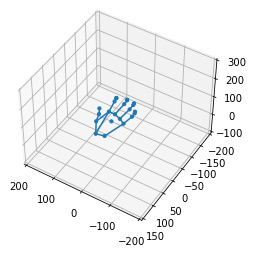

In [69]:
%matplotlib inline
plot_row_bones(data.iloc[15])

<IPython.core.display.Javascript object>


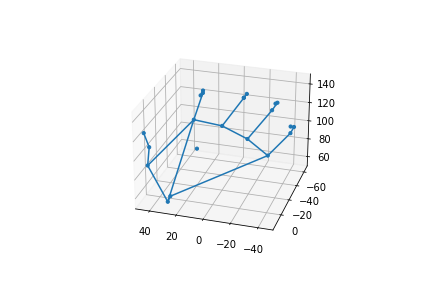

In [70]:
%matplotlib notebook

rel_df = df.copy(deep=True)

plot_row_bones(rel_df.iloc[25])

Taking away the positions do not seem to work.

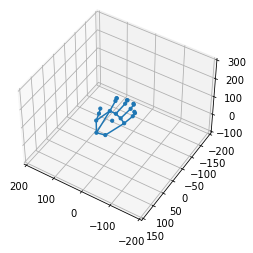

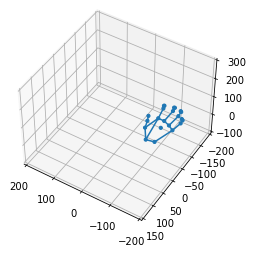

In [29]:
examp = data.iloc[1]

plot_row_bones(examp)

examp = examp - 100
plot_row_bones(examp)

In [87]:
# Making a relative model based on the wrist
relative_from = 'Palm'

df = data.copy(deep=True)
shift_x = data[relative_from+'_x']
shift_y = data[relative_from+'_y']
shift_z = data[relative_from+'_z']

df = df.drop([relative_from+'_x', relative_from+'_y', relative_from+'_z'], 1)

df[bone_cols_x] = df[bone_cols_x].sub(shift_x, axis=0)
df[bone_cols_y] = df[bone_cols_y].sub(shift_y, axis=0)
df[bone_cols_z] = df[bone_cols_z].sub(shift_z, axis=0)
df.head(1).drop(channel_cols,1)

,Wrist_x,Wrist_y,Wrist_z,Thumb_MCP_x,Thumb_MCP_y,Thumb_MCP_z,Thumb_PIP_x,Thumb_PIP_y,Thumb_PIP_z,Thumb_DIP_x,...,Pinky_MCP_z,Pinky_PIP_x,Pinky_PIP_y,Pinky_PIP_z,Pinky_DIP_x,Pinky_DIP_y,Pinky_DIP_z,Pinky_TIP_x,Pinky_TIP_y,Pinky_TIP_z
0,44.021769,66.015896,47.518034,21.690527,40.290092,20.508894,42.880421,13.246122,-15.541786,7.914639,...,124.347376,127.374178,155.724541,135.062822,142.242907,140.885139,117.125345,138.715593,143.555023,106.195253


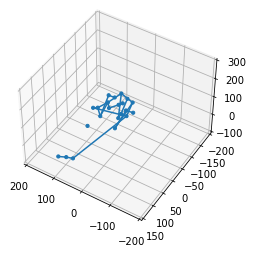

In [106]:
rel_df = df.copy(deep=True)
rel_df['Palm_x'] = 0
rel_df['Palm_y'] = 0
rel_df['Palm_z'] = 0

plot_row_bones(rel_df.iloc[15])

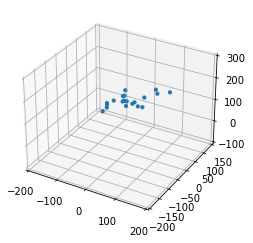

In [96]:
pred_points = df.iloc[15].drop(channel_cols).values.reshape((3, pred_points.shape[0]//3))



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(-200, 200), ylim=(-200, 150), zlim=(-100, 300))
points_ = np.zeros((3, NUM_POINTS))
patches = ax.scatter(points_[0], points_[1], points_[2], s=10, alpha=1)

plot_points(pred_points, patches)